In [40]:
from google.colab import files
uploaded = files.upload()

Saving problem01_house_prices.csv to problem01_house_prices (2).csv


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_error,r2_score, mean_absolute_error
import joblib


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [43]:
df = pd.read_csv('problem01_house_prices.csv')

In [44]:
df.head()

,sqft,bedrooms,age,price
0,1748.4,2,24,245753.77
1,1430.9,2,20,198923.17
2,1823.8,1,35,277125.21
3,2261.5,1,22,301634.81
4,1382.9,1,15,234062.97


In [45]:
df = pd.read_csv('problem01_house_prices.csv')


In [46]:
df.head()

,sqft,bedrooms,age,price
0,1748.4,2,24,245753.77
1,1430.9,2,20,198923.17
2,1823.8,1,35,277125.21
3,2261.5,1,22,301634.81
4,1382.9,1,15,234062.97


              sqft    bedrooms         age          price
count   200.000000  200.000000  200.000000     200.000000
mean   1480.163000    3.035000   24.195000  221535.409000
std     464.033287    1.457531   14.593899   63302.737512
min     300.000000    1.000000    0.000000   52253.720000
25%    1147.450000    2.000000   11.750000  178508.370000
50%    1497.950000    3.000000   24.500000  229569.955000
75%    1750.450000    4.000000   36.250000  260398.120000
max    2860.100000    5.000000   49.000000  424287.910000


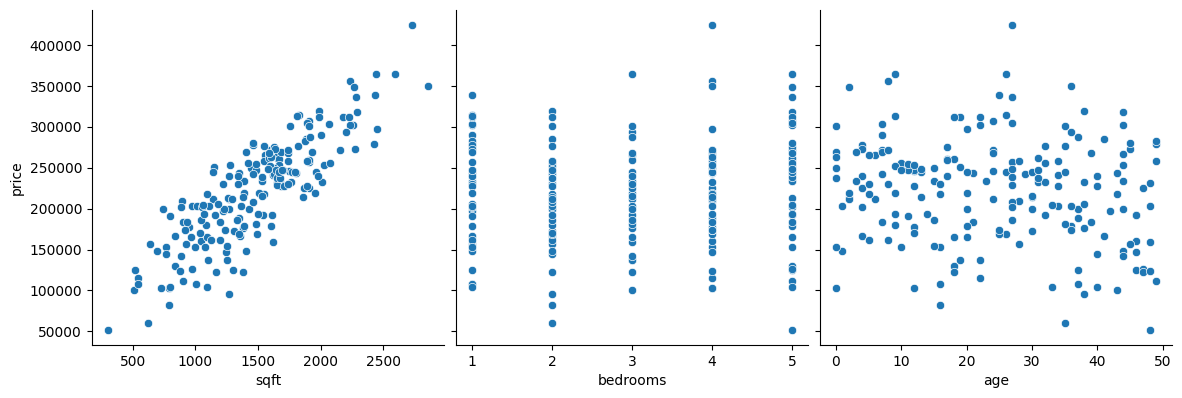

In [47]:
print(df.describe())
sns.pairplot(df, x_vars = ['sqft','bedrooms','age'],y_vars='price', height  =4,aspect=1, kind='scatter')
plt.show()

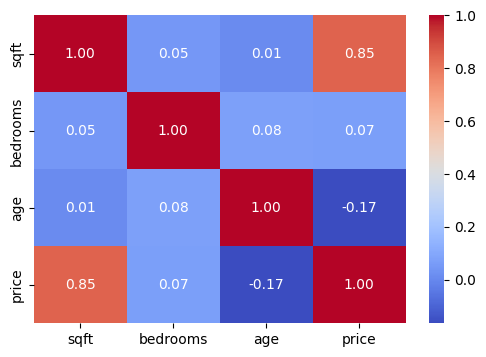

In [48]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [49]:
X = df[['sqft', 'bedrooms','age']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

RMSE: 22673.8142085912
MAE: 18830.53451614444
R²: 0.8136651909719187


In [31]:
coeffs = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

In [32]:
print("Intercept:", model.intercept_)
print(coeffs)

Intercept: 58952.885075294034
    Feature  Coefficient
0      sqft   116.861041
1  bedrooms  2563.194757
2       age  -772.933290


In [37]:

results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})
print(results.head(10))


      Actual      Predicted
0  144212.79  122934.594479
1  197482.55  171494.804206
2  161455.96  198023.882223
3  183759.52  161214.698909
4  275990.40  220456.650247
5  228519.95  236124.281813
6  206206.20  169736.804176
7  202114.27  174211.430216
8  272446.05  249877.789722
9  211398.15  197801.336913


In [39]:
new_house = pd.DataFrame({
    "sqft": [2000],
    "bedrooms": [3],
    "age": [5]
})

predicted_price = model.predict(new_house)
print("Predicted Price for new house:", predicted_price[0])

Predicted Price for new house: 301626.2738953186


In [33]:
joblib.dump(model, "house_price_model.pkl")
print(" Model saved as house_price_model.pkl")

 Model saved as house_price_model.pkl
